### Author: Jose Miguel Bautista
### Updated: 05/31/2024

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Preface: Heuristic Methods

Skiena goes over combinatorial and heuristic search methods in the book at a relatively shallow level.  
In combinatorics/backtracking, I feel this is because there is not much that can be said about the pure theory of the method.  
Much of the practical difficulty comes from adapting and implementing it to specific instances.  
Plus, any problem where backtracking is a viable solution is typically not *that* large, at least not for a computer.  
For the largest problems, backtracking is still going to fail and we have to resort to heuristics.

Heuristic methods are sort of the opposite of backtracking in the sense that a LOT of time has been spent developing theory for them, because 
1. They are not monolithic - many different methods have been developed for different reasons/problems/constraints.  
1. Why a given heuristic works (or doesn't) is often best understood in the context of the problem it was developed for.  

With that said, it is somewhat impractical to go over all of them in great depth.  
What is presented in the book are more like families of heuristics.  
Below I will go through the 3 families Skiena mentioned: random sampling, local search, and simulated annealing.  


# Random Search / Monte Carlo 

The simplest method to search in a solution space uses random sampling.  
This is also called the **Monte Carlo** method, named for the Monte Carlo casino.  

In short: make a solution randomly (called a "draw"), and just keep making them for a while before returning the best result.  
Here, the name of the game is volume.  
You can think of it like shooting a bullseye with a shotgun: you don't really expect any shot to hit the *exact* center, but at least one of them should be close.  
Similarly, as long as you can sample the solution space uniformly or favorably, we should get results that are at least close to the best answer.  
Mind that such sampling can be subtle. 

Below I have 2 example problems with Monte Carlo solutions.  
1. Approximating the value of $\pi$
2. Finding the largest possible sum of a binary array.

## $\pi$ Approximation

I borrowed this idea from the [Wikipedia page on Monte Carlo](https://en.wikipedia.org/wiki/Monte_Carlo_method).  
The idea is to uniformly populate a $1\times 1$ Cartesian square with points.  
Then find the number of points whose (cylindrical) radius is less than $1$.  
Because the square is uniformly populated, we expect the number of such points to be proportional to the area of a quarter circle.  
By taking the ratio with the total number of points, we can estimate $\pi$.  

In [123]:
# demo for Monte Carlo approximation of pi

def piApprox_rand(N):
    x = np.random.uniform(0, 1, N)
    y = np.random.uniform(0, 1, N)
    r = x**2 + y**2
    approx = 4*len(r[r<1]) / len(r)
    return approx

offset = 0
exp = np.arange(25)+offset
approxs = np.array([piApprox_rand(2**x) for x in exp])

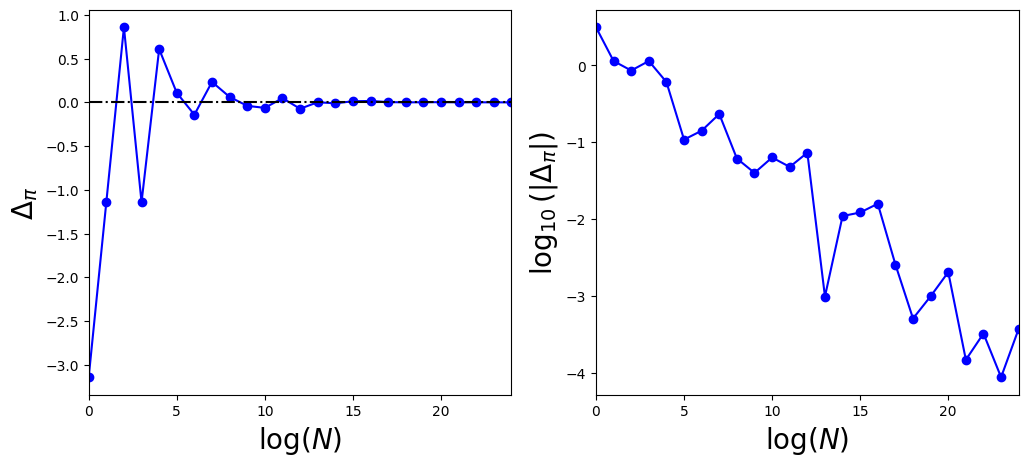

In [124]:
fig, axs = plt.subplots(1, 2, figsize = (12, 5))
axs[0].plot(exp, approxs - np.pi, marker = 'o', color = 'b')
axs[0].plot(exp, np.zeros(len(exp)), color = 'k', linestyle='-.')
axs[0].set_xlabel(r'$\log (N)$', fontsize = 20)
axs[0].set_ylabel(r'$\Delta_{\pi}$', fontsize=20)
axs[0].set_xlim(min(exp), max(exp))

axs[1].plot(exp, np.log10(abs(approxs - np.pi)), marker = 'o', color = 'b')
axs[1].set_xlabel(r'$\log (N)$', fontsize = 20)
axs[1].set_ylabel(r'$\log_{10}(|\Delta_{\pi}|)$', fontsize=20)
axs[1].set_xlim(min(exp), max(exp))
plt.show()

We see that as we increase the number of our guesses, the difference from the actual value of $\pi$ is asymptotically $0$.    
This shows a good case for Monte Carlo - when math and statistics (i.e. law of large numbers) are on our side.  

A way to think about it is that we are searching a space of ways to put $N=2^{20}$ points on a $1 \times 1$ square.  
If every point on the square is equally likely to be assigned per point, the are more ways to place all points s.t. their ratio is closer to $\pi$ than not.  
So any time we run a simulation, we are overwhelmingly likely to get a configuration that is close to the correct ratio.  

## Maximum Sum 

Suppose we had an $N$-length array of either 1s or 0s: what is the largest possible sum?  
Clearly it's just $N$, but what does a Monte Carlo simulation say?  

Below I have demo code for both the single-try and multi-try sums.  
The arrays are generated based on threshold value applied to a uniformly random array (lower threshold = more ones).  
Assuming the distribution is favorable, I set the threshold to $0.2$.  

As one may expect, a single randomly generated sum has an expected value of $N(1-\text{THRESH})$.  
The actual drawn value has some variance about this value that decreases with dimensionality $N$.  

For the multi-try, I made it so the number of draws is proportional to $N$ as well.  
It certainly helped the low-$N$ case, but the improvement dies off to barely anything at high-$N$.  

In [93]:
# demo for Monte Carlo search of max sum for N-length binary array

def maxSum_rand(N, thresh = 0.5):
    x = np.random.uniform(0, 1, N)
    x = (x>thresh).astype(int)
    return sum(x)

In [127]:
offset = 0
thresh = 0.2 # let's give it a generous chance to work
exp = np.arange(15)+offset
sums_s = np.array([maxSum_rand(2**x, thresh) for x in exp]) # Single draw results
sums_m = np.array([maxSum_rand(2**x, thresh) for x in exp]) # Multi-draw results

for i in range(len(exp)):
    #draws = 3+2*i # don't want to wait too long
    draws = 3+2**i # can wait a while
    best = sums_m[i]
    for j in range(draws):
        trial = maxSum_rand(2**exp[i], thresh)
        if (best < trial):
            best = trial
    sums_m[i] = best 


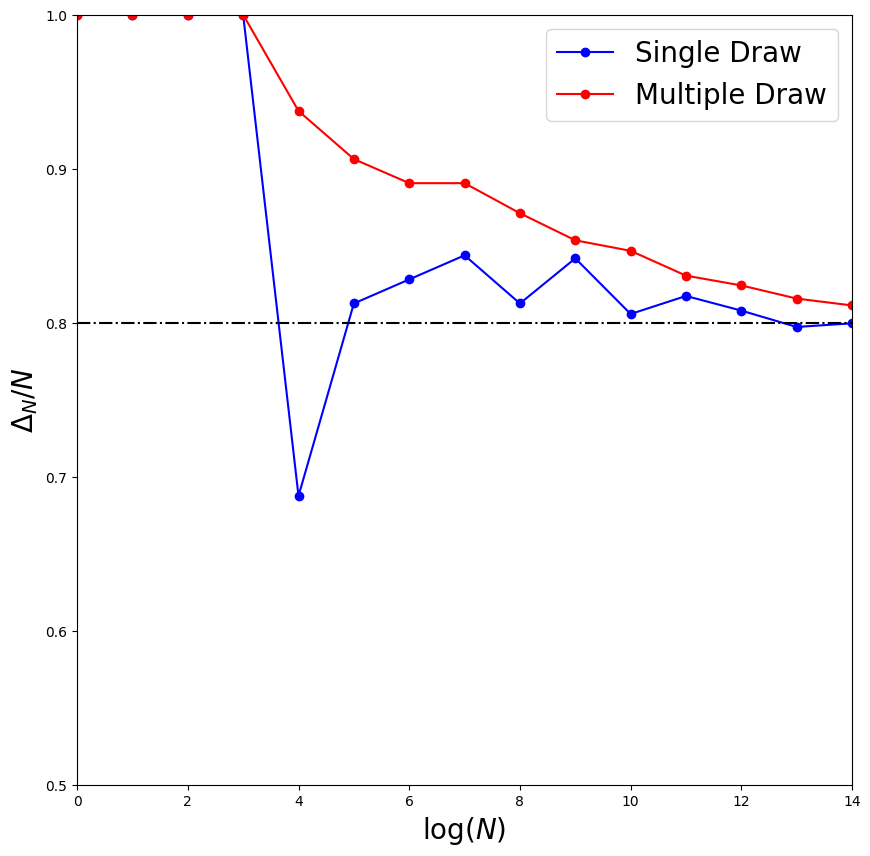

In [130]:
plt.figure(figsize = (10, 10))
plt.plot(exp, sums_s/2**exp, marker = 'o', color = 'b', label = 'Single Draw')
plt.plot(exp, sums_m/(2**exp), marker = 'o', color = 'r', label = 'Multiple Draw')
plt.plot(exp, (1-thresh)*np.ones(len(exp)), color = 'k', linestyle='-.')
plt.xlabel(r'$\log (N)$', fontsize = 20)
plt.ylabel(r'$\Delta_{N}/N$', fontsize=20)
plt.xlim(min(exp), max(exp))
plt.ylim(0.5, 1)
plt.legend(fontsize=20)
plt.show()

The point of all this is to show that in Monte Carlo:
1. You are at the mercy of your sampling.  
Monte Carlo generally only samples [some typical volume](http://zackmdavis.net/blog/2019/05/the-typical-set/) of the solution space.  
For the code above, it mostly samples the space of arrays with (normalized) sum approximately close to the threshold.  
If the solution you actually want (like the maximum) is in an unlikely region of the solution space, you will realistically never find it.
1. The larger the [dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality) of the problem, the more solutions you would need to try before concluding the space is well-sampled.  
The case above is effectively a series of $N$ coin-tosses (with an unfair coin).  
This makes a state space of $2^N$ states ($N+1$ possible combinations of heads or tails), so to reasonably sample this requires a similar amount of draws.  
What makes this worse is that large dimensionality draws are themselves usually slow to handle.

As Skiena points out though, you could justify using this if you have absolutely no idea how to relate different solutions anyway.  
The problem *may* have a way to relate solutions, but you may (through no immediate fault of your own) just not know how it works.  
In that case, the best course of action is to act as if different options are totally independent because we can do no better.   


# Local Search

If we can relate the solutions though, we can exploit that information to help the search.  
Given a trial solution, check the local neghborhood of solutions to see if any of them are better.  
Move to the the best solution and iterate, checking for better neighbors and moving around until you are satisfied.  
If the number of neighbors is relatively low, you *could* just run an explicit check.  
But for most problems you'd consider with this method, this is far too slow and we don't want to explicitly make the entire neighborhood.  

Skiena goes over one example algoithm, [hill-climbing](https://en.wikipedia.org/wiki/Hill_climbing).  
Starting at some arbitrary point, we want to find either the highest peak/lowest valley.  
To do this, we take a step in some direction that raises/lowers our height.  
Repeat until we reach a point where none of the neighbors improve your evaluation.  

When you do your Data Mining and Wrangling course and get to representative clustering, you should learn about a few local search algorithms.  
1. **K-means:**
    1. [Lloyd's algorithm](https://en.wikipedia.org/wiki/Lloyd%27s_algorithm)
    1. [Elkan variant](https://cdn.aaai.org/ICML/2003/ICML03-022.pdf)
1. **K-medoids:**
    1. [PAM](https://en.wikipedia.org/wiki/K-medoids#Partitioning_Around_Medoids_(PAM))
    1. [CLARA](https://scikit-learn-extra.readthedocs.io/en/stable/modules/cluster.html)
    1. [CLARANS](https://ieeexplore.ieee.org/document/1033770)

I will leave those for your DMW class, and at this stage I will just note the commonalities.  

For one, they all use iteration to improve the solution.  
As long as your space admits a neighborhood-based representation and the cost of local moves is less than global evaluation, this is a reasonable approach.  
For another, they all perform searches for *local* extrema.  
What that means for us is that this is guaranteed to work if (and only if) the search space is globally convex/concave.  
Otherwise, the algorithm may find one or multiple local minima/maxima depending on its initial position.  
This should remind you of the discussion on greedy algorithms, because it is exactly the same idea.  

**Note:** At this stage I should mention that true local extrema are mostly a concern of low-dimensionality problems.   
High-dimensionality problems carry their own issues, but one of the benefits is that it is harder to make local minima/maxima.  
This is because for an extremum to exist, it has to be smaller/larger than *all* of its neighbors.  
Higher dimensionality means there are more neighbors to any given spot, so it is more likely at least one of them will be a better solution.  

# Simulated Annealing

Part of the trouble with local search is the constant threat of getting trapped in local minima (suboptimal solutions).  
The picture you should have in your mind is that of a ball rolling around in some landscape with a bunch of hills/mountains and ditches/valleys.  
<img src="img/18_landscape.png" style="width: 30em"/>  

If we start close to the global minimum ($0.3$), we should be able to fall into it.  
If we start anywhere to the right of the hill ($0.7$ onwards) we will get trapped in the ditch.  
But if we do get trapped, we could try kicking the ball out against the natural direction it wants to go.  
This will just take some energy to get over the little hump.  

**Simulated annealing** is a heuristic search procedure that is similar to local search, except the traversal is inherently probabilistic.  
This is based on [actual annealing](https://en.wikipedia.org/wiki/Annealing_(materials_science)), which is bringing a material from high (above recrystalization) to low temperature very slowly.  
The reason is to let the material's molecules reorient themselves while avoiding dislocations, which are deleterious to most material properties. 

As an example, some metals are made of effectively [tiny magnets](https://en.wikipedia.org/wiki/Ising_model).  
Normally, they are stuck in whatever orientation nature set them in (randomly); I will just draw them as arrows.  
<img src="img/18_ising.png" style="width: 30em"/>  

But these magnets would be happier (lower-energy) if they were all aligned in the same direction.  
If we heat them up, the magnets will get unstuck and can reorient themselves according to their neighbors.  
After they find their preferred orientation, then we can just cool them down and lock-in the new orientation.  
If we do it too quickly though, we might end up with a dislocation as shown below.  
<img src="img/18_dw.png" style="width: 30em"/>  

What happens is that one half initially decided to point up, while the other half decided to point down.  
Because we cooled too quickly, both clusters of up and down grew until they ran into each other.  
At that point, it was too late because it's too cold and the edges are surrounded by equal amounts of up and down.  
If we cooled more slowly, we keep some heat around and can (temporarily) transition to a less-preferred state.  
This lets the system work out these local conflicts to climb out of the local well and find the actual minimum (either all-up, or all-down).  

I recognize this is probably getting to be too much physics for an algorithms class, so I will summarize it as follows: 
>Simulated annealing works because solutions are only trapped for as long as the neighborhood is deep.  
Local minima tend to be in shallow and narrow basins, while global ones tend to be in deep and wide ones.  
If the cooling is not too fast, it will escape the local minima in reasonable time to find the global minimum.  

As far as actually doing simulated annealing on a computer, the algorithm I would point to is the [Metropolis-Hastings algorithm](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm).  
Full appreciation of this method entails understanding at least some statistical mechanics, in my opinion (Skiena seems to disagree).  
We'll work out some of the important bits in Physics 2.  
But if you really want to start doing it, [here](https://github.com/butlerc9/ising-model-sudoku-simulation/tree/master) is a github page (credit: Cormac Butler).  
It applies simulated annealing to both the Ising model (read:magnets problem) and Sudoku.  
